<a href="https://colab.research.google.com/github/Hiroj12b/Cn6005/blob/main/w6_Clustering_Lab_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
df = pd.read_csv('//content/diabetesN (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=np.number)
numerical_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [36]:
# Assuming you meant to use 'Country-data.csv' for these columns
# If you are using 'diabetesN (1).csv', please check the column names in df.info()
X = df['Pregnancies']
Y = df['Glucose']
import numpy as np
data = np.array(list(zip(X, Y)))
data
X

,Pregnancies
0,6
1,1
2,8
3,1
4,0
...,...
763,10
764,2
765,5
766,1


In [37]:
# same thing using index location
xx = df.iloc[:,[3,5]]
xx

,SkinThickness,BMI
0,35,33.6
1,29,26.6
2,0,23.3
3,23,28.1
4,35,43.1
...,...,...
763,48,32.9
764,27,36.8
765,23,26.2
766,0,30.1


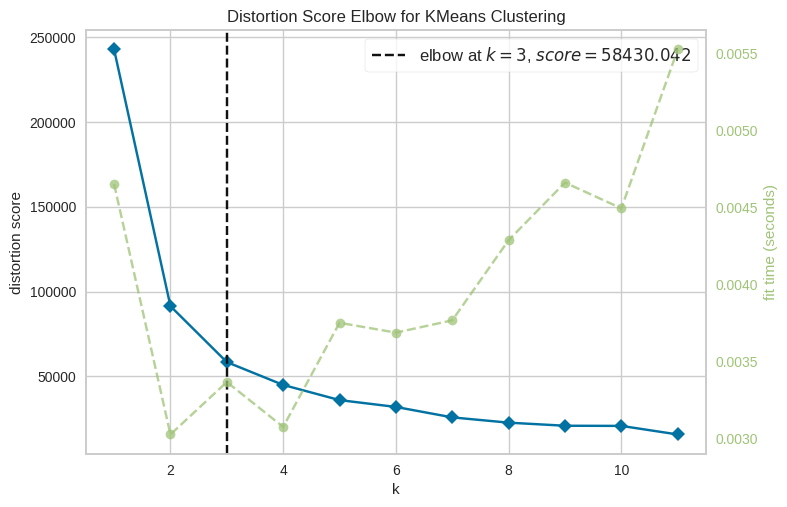

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(xx)
visualizer.show()

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(xx)

In [40]:
kmeans.labels_

array([1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1,
       2, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2,
       1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1,
       2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2,

In [41]:
#We assign the labels to each row in dataframe.
xx["Clus_km"] = kmeans.labels_
xx.head(15)

/tmp/ipython-input-2429469179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx["Clus_km"] = kmeans.labels_


,SkinThickness,BMI,Clus_km
0,35,33.6,1
1,29,26.6,0
2,0,23.3,2
3,23,28.1,0
4,35,43.1,1
5,0,25.6,2
6,32,31.0,1
7,0,35.3,2
8,45,30.5,1
9,0,0.0,2


In [42]:
kmeans.cluster_centers_

array([[22.33214286, 28.44392857],
       [37.7751004 , 37.94819277],
       [ 0.47280335, 29.94518828]])

In [43]:
#Get each cluster size,
from collections import Counter
Counter(kmeans.labels_)

Counter({np.int32(1): 249, np.int32(0): 280, np.int32(2): 239})

In [44]:
from sklearn import metrics
clusters = kmeans.labels_.tolist()

ClusterCentroid=kmeans.cluster_centers_
clustervalidation=metrics.silhouette_score(xx,clusters, metric='euclidean')
print(clustervalidation)

0.4739081896755331


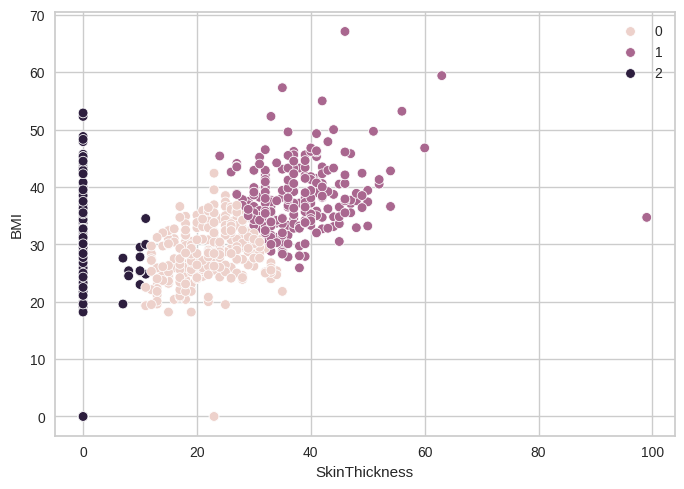

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=xx, x="SkinThickness", y="BMI", hue=kmeans.labels_)
plt.show()

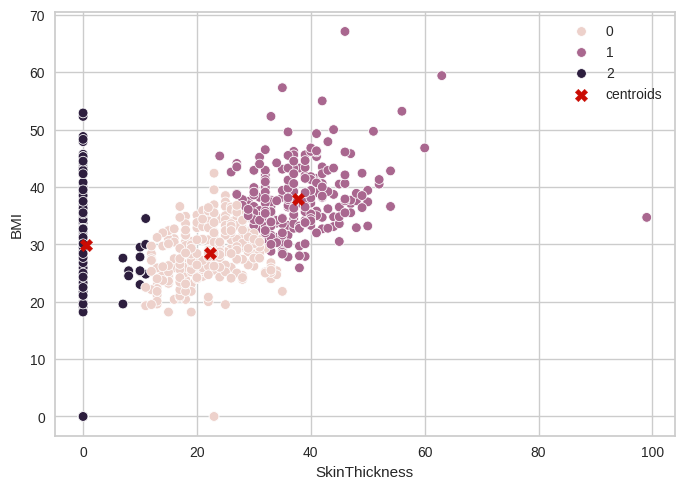

In [49]:
sns.scatterplot(data=xx, x="SkinThickness", y="BMI", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [52]:
newdata=[[85.89,30400],[10,10000],[15,1700],[3,6000]]
d=pd.DataFrame(newdata,columns=['SkinThickness','BMI'])
#d=[[15,1700]]
predictedClusters=kmeans.predict(d)
print(len(predictedClusters))
print(d)
print(predictedClusters)

4
   SkinThickness    BMI
0          85.89  30400
1          10.00  10000
2          15.00   1700
3           3.00   6000
[1 1 1 1]
